In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

# For reproducibility
np.random.seed(42)


In [13]:
# Create a sample time series with a linear trend and noise
n = 100
time = np.arange(n)
trend = 0.05 * time
noise = np.random.normal(0, 1, n)
series = trend + noise

# Create a pandas DataFrame
data = pd.DataFrame(series, columns=["value"])


In [14]:
# Fit an ARIMA(1, 1, 1) model (first difference for stationarity)
model = ARIMA(data["value"], order=(1, 1, 1))
fitted_model = model.fit()

# Print the summary of the model
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -139.156
Date:                Fri, 11 Oct 2024   AIC                            284.313
Time:                        07:45:34   BIC                            292.098
Sample:                             0   HQIC                           287.462
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0656      0.146     -0.448      0.654      -0.352       0.221
ma.L1         -0.7885      0.086     -9.137      0.000      -0.958      -0.619
sigma2         0.9632      0.139      6.941      0.0

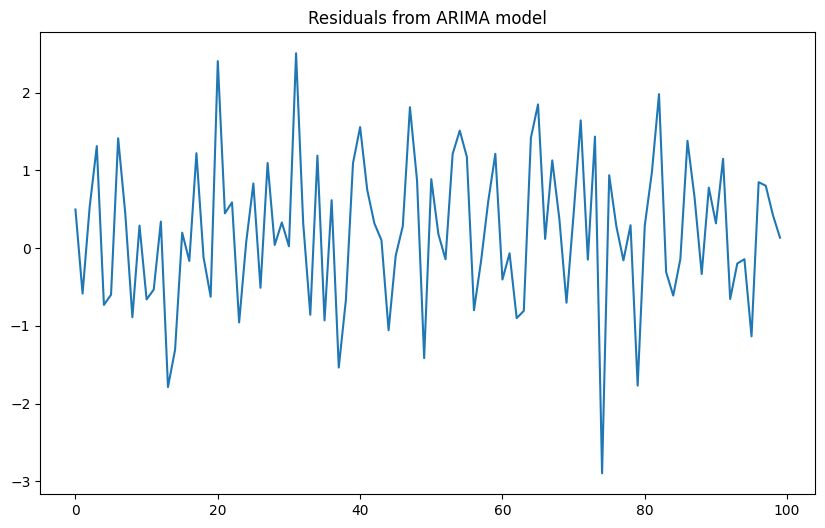

In [15]:
# Extract residuals
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals from ARIMA model")
plt.show()


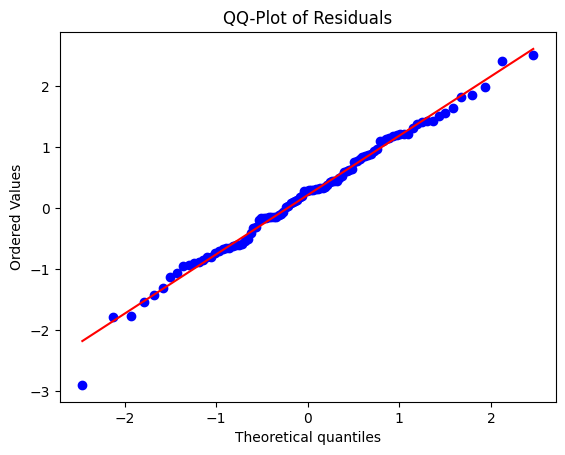

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# QQ-plot of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals")
plt.show()


In [17]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on residuals
shapiro_test_statistic, p_value = shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Residuals are normally distributed (fail to reject H0).")
else:
    print("Residuals are not normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.9922786355018616
P-value: 0.8410273790359497
Residuals are normally distributed (fail to reject H0).


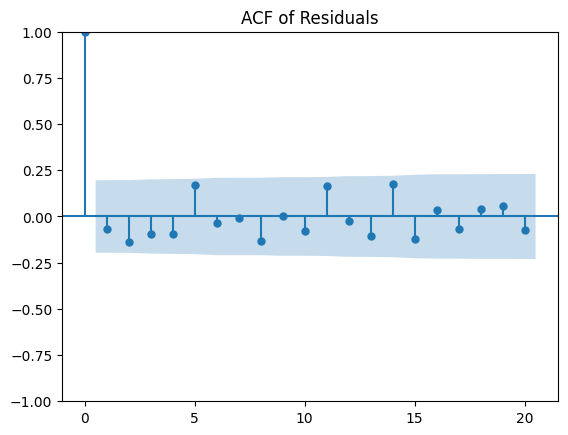

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF of residuals
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()


/Users/garvin/opt/anaconda3/envs/cds/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


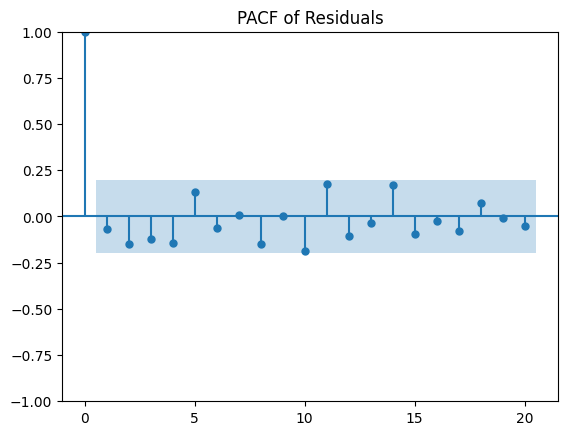

In [20]:
# Plot ACF of residuals
plot_pacf(residuals, lags=20)
plt.title("PACF of Residuals")
plt.show()

In [19]:
# Perform Ljung-Box test on residuals
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_test)


      lb_stat  lb_pvalue
10  10.184463   0.424462
